In [1]:
import json

import pandas as pd

In [2]:
# json_path = "/home/temochka2005/Documents/VScodeProjects/TbankSirius/projectrep/llm-recommender/data/pairs_test_real.json"
# csv_path = "/home/temochka2005/Documents/VScodeProjects/TbankSirius/projectrep/llm-recommender/data/category_triplets.csv"

json_path = "/home/temochka2005/Documents/VScodeProjects/TbankSirius/projectrep/llm-recommender/data/pairs_test_synth (2).json"
csv_path = "/home/temochka2005/Documents/VScodeProjects/TbankSirius/projectrep/llm-recommender/data/new_categories_34_percent.csv"


# Step 1: Load the JSON file
with open(json_path, "r", encoding="utf-8") as f:
    json_data = json.load(f)

# Convert JSON into a DataFrame
predicted_data = pd.DataFrame(
    json_data, columns=["user_category_1", "user_category_2", "predicted_category"]
)

print(predicted_data.__len__)
predicted_data.head()
# Step 2: Load the CSV file


<bound method DataFrame.__len__ of          user_category_1                             user_category_2  \
0          Игровые жанры                                   Освещение   
1            PlayStation                     Медицинские инструменты   
2            PlayStation             Автоаксессуары и принадлежности   
3               Nintendo  Оборудование и принадлежности для торговли   
4               Nintendo    Оборудование и материалы для тату-салона   
..                   ...                                         ...   
160       Столы и стулья                           Бизнес-литература   
161       Столы и стулья   Мебель и оборудование для салонов красоты   
162       Столы и стулья                                      Мебель   
163  Мебель для хранения                             Печати и штампы   
164  Мебель для хранения   Медицинские изделия и расходные материалы   

                                    predicted_category  
0           Игрушки и игры; Неизвестно; Игр

,user_category_1,user_category_2,predicted_category
0,Игровые жанры,Освещение,Игрушки и игры; Неизвестно; Игрушки и игры
1,PlayStation,Медицинские инструменты,Компьютеры и периферия; Музыкальные инструмент...
2,PlayStation,Автоаксессуары и принадлежности,Игровые наушники; Неизвестно; Музыкальные инст...
3,Nintendo,Оборудование и принадлежности для торговли,Игрушки и игры; Наушники и аудиотехника; Компь...
4,Nintendo,Оборудование и материалы для тату-салона,Игровые приставки; Умный дом; Электроника для ...


In [3]:
predicted_data[
    (predicted_data["user_category_1"] == "Детям")
    & (predicted_data["user_category_2"] == "Уход за волосами")
]

,user_category_1,user_category_2,predicted_category


In [4]:
actual_data = pd.read_csv(csv_path, sep=",")
actual_data

,user_category_1,user_category_2,predicted_category,explanation
0,Смартфоны,PC,Наушники и аудиотехника,"As the user values both smartphones and PCs, e..."
1,Смартфоны,PC,Умный дом,Interest in advanced tech like smartphones and...
2,Смартфоны,PC,Игровые консоли,"Interest in PCs implies a penchant for gaming,..."
3,Смартфоны,PC,"Ноутбуки, планшеты и электронные книги",Complementing their use of PCs and smartphones...
4,Смартфоны,PC,Комплектующие для ПК,"Since the user is interested in PCs, they migh..."
...,...,...,...,...
4019,Мебель для хранения,Медицинские инструменты,Медицинские приборы,Combines interest in storage and medical tools...
4020,Мебель для хранения,Медицинские инструменты,Умный дом,Interest in organized storage can extend to sm...
4021,Мебель для хранения,Медицинские инструменты,Организация вещей,A natural extension of storage interests with ...
4022,Мебель для хранения,Медицинские инструменты,Комплектующие для ПК,Interest in storage could translate to organiz...


In [5]:
# Step 3: Merge data on user_category_1 and user_category_2
actual_test_data = pd.merge(
    actual_data,
    predicted_data,
    on=["user_category_1", "user_category_2"],
    how="inner",
)
actual_test_data

,user_category_1,user_category_2,predicted_category_x,explanation,predicted_category_y
0,Игровые жанры,Освещение,Оборудование и принадлежности для торговли,Combining an interest in immersive gaming expe...,Игрушки и игры; Неизвестно; Игрушки и игры
1,Игровые жанры,Освещение,Компьютеры и периферия,This category merges the gaming interest with ...,Игрушки и игры; Неизвестно; Игрушки и игры
2,Игровые жанры,Освещение,Крутая бытовая техника,An interest in modern gaming and lighting may ...,Игрушки и игры; Неизвестно; Игрушки и игры
3,Игровые жанры,Освещение,Умный дом,This combines an interest in lighting with a t...,Игрушки и игры; Неизвестно; Игрушки и игры
4,Игровые жанры,Освещение,Аксессуары для киберспорта,A gaming passion paired with a knack for light...,Игрушки и игры; Неизвестно; Игрушки и игры
...,...,...,...,...,...
760,Мебель для хранения,Медицинские изделия и расходные материалы,Техника для дома,С удобной техникой они могут повысить функцион...,Компьютеры и периферия; Декор и интерьер; Умны...
761,Мебель для хранения,Медицинские изделия и расходные материалы,Аксессуары для электроники,Организация и оптимизация техники и аксессуаро...,Компьютеры и периферия; Декор и интерьер; Умны...
762,Мебель для хранения,Медицинские изделия и расходные материалы,Офисная техника,Эта категория поможет эффективно управлять как...,Компьютеры и периферия; Декор и интерьер; Умны...
763,Мебель для хранения,Медицинские изделия и расходные материалы,Климатическая техника,Это улучшит обстановку в комнате хранения и об...,Компьютеры и периферия; Декор и интерьер; Умны...


In [6]:
# Convert user_category_3 into list for the same pairs without lambda
actual_test_data = actual_test_data.groupby(
    ["user_category_1", "user_category_2"], as_index=False
).agg({"user_category_3": list, "predicted_category": "first"})

actual_test_data

KeyError: "Column(s) ['predicted_category', 'user_category_3'] do not exist"

In [ ]:
# Filter rows where the length of user_category_3 list is greater than or equal to 1
actual_test_data[actual_test_data["user_category_3"].apply(len) == 5]

In [ ]:
actual_test_data[
    (actual_test_data["user_category_1"] == "Детям")
    & (actual_test_data["user_category_2"] == "Уход за волосами")
]

In [ ]:
# Step 4: Compare user_category_3 and predicted_category

# actual_test_data["is_correct"] = actual_test_data.apply(
#     lambda row: row["predicted_category"] in row["user_category_3"], axis=1
# )

# Convert semicolon-separated predicted_category into a list
actual_test_data["predicted_category"] = actual_test_data["predicted_category"].apply(
    lambda x: x.split("; ")
)

# Compare user_category_3 (list) and predicted_category (list)
actual_test_data["is_correct"] = actual_test_data.apply(
    lambda row: any(
        pred in row["user_category_3"] for pred in row["predicted_category"]
    ),
    axis=1,
)


actual_test_data

In [10]:
# Step 5: Compute Precision
true_positives = actual_test_data["is_correct"].sum()
false_positive = (~actual_test_data["is_correct"]).sum()
# Avoid division by zero
precision_value = (
    true_positives / (true_positives + false_positive)
    if (true_positives + false_positive) > 0
    else 0
)

In [ ]:
print(f"True Positives: {true_positives}")
print(f"False Negatives: {false_positive}")
print(f"Precision: {precision_value}")


In [5]:
import json


def match_rate(predictions_path: str, cluster_descriptions_path: str) -> float:
    """
    Calculate the match rate of predictions with cluster descriptions.
    Match rate is calculated as the proportion of predicted categories
    that exist in the cluster descriptions.

    :param predictions_path: Path to a JSON file containing predictions in the specified format.
                             Format: [
                                 ["category_1", "category_2", "predicted_category; ..."],
                                 ...
                             ]
    :param cluster_descriptions_path: Path to a JSON file containing valid cluster descriptions.
                                       Format: ["description_1", "description_2", ...]
    :return: Match rate as a float (between 0 and 1).
    """
    # Load predictions
    with open(predictions_path, "r", encoding="utf-8") as f:
        predictions = json.load(f)

    # Load cluster descriptions
    with open(cluster_descriptions_path, "r", encoding="utf-8") as f:
        cluster_descriptions = set(json.load(f))  # Convert to set for faster lookups

    # Initialize match counters
    total_matches = 0  # Total number of matches
    total_categories = 0  # Total number of predicted categories

    # Process predictions
    for prediction in predictions:
        # Extract the predicted categories and split by semicolon
        predicted_categories = prediction[2].split("; ")

        # Count matches and total predicted categories
        total_matches += sum(
            1 for pred in predicted_categories if pred in cluster_descriptions
        )
        total_categories += len(predicted_categories)

    # Calculate match rate
    match_rate = total_matches / total_categories if total_categories > 0 else 0.0

    return match_rate


In [ ]:
match_rate(
    predictions_path="../data/pairs_test_synth (2).json",
    cluster_descriptions_path="../data/cat2list.json",
)

In [6]:
import numpy as np
import pandas as pd


def novelty_metric(interactions_path: str) -> float:
    """
    Calculate the novelty metric for recommendations based on interaction data.

    :param interactions_path: Path to the CSV file containing user interactions data.
    :return: Novelty metric as a float, where a higher value indicates more novel
             recommendations based on item popularity.
    """

    interactions_df = pd.read_csv(interactions_path)

    if interactions_df.empty:
        print("No interaction data available for novelty calculation.")
        return 0

    # Compute item popularity based on interaction frequencies
    item_popularity = interactions_df["item_id"].value_counts(normalize=True)

    # Filter the popularity for recommended items
    recommended_popularities = item_popularity.reindex(
        set(interactions_df["item_id"]), fill_value=0
    )

    novelty = (
        -recommended_popularities.mean() * np.log(recommended_popularities.mean())
        if not recommended_popularities.empty
        else 0
    )

    return novelty

In [ ]:
novelty_metric(
    "/home/temochka2005/Documents/VScodeProjects/TbankSirius/projectrep/llm-recommender/data/interactions.csv"
)

In [ ]:
from collections import Counter

import pandas as pd


def generate_triplets(
    interactions_path,
    items_path,
    start_date=None,
    end_date=None,
    min_count=1,
    output_path="category_triplets.csv",
):
    """
    Generate triplets of categories with counts, filtered by date range and minimum count.

    :param interactions_path: Path to the interactions CSV file.
    :param items_path: Path to the items CSV file.
    :param start_date: Start date for filtering interactions (inclusive, format: 'YYYY-MM-DD').
    :param end_date: End date for filtering interactions (inclusive, format: 'YYYY-MM-DD').
    :param min_count: Minimum count of triplets to include in the output.
    :param output_path: Path to save the resulting CSV file.
    """
    # Load datasets
    interactions = pd.read_csv(
        interactions_path, usecols=["time", "user_id", "item_id", "interaction"]
    )
    items = pd.read_csv(items_path, usecols=["item_id", "cat2"])

    # Map item_id to cat2 category
    items_mapping = items.set_index("item_id")["cat2"]
    interactions["cat2"] = interactions["item_id"].map(items_mapping)

    # Filter by date range if specified
    if start_date:
        interactions = interactions[interactions["time"] >= start_date]
    if end_date:
        interactions = interactions[interactions["time"] <= end_date]

    # Filter interactions (interaction == 1)
    like_interactions = interactions[interactions["interaction"] == 1].copy()

    # Sort by user_id and time for sequential processing
    like_interactions = like_interactions.sort_values(by=["user_id", "time"])

    # Generate triplets for each user
    triplets = (
        (categories[i], categories[i + 1], categories[i + 2])
        for user_id, group in like_interactions.groupby("user_id")
        for categories in [group["cat2"].dropna().tolist()]
        for i in range(len(categories) - 2)
        if categories[i] != categories[i + 1] != categories[i + 2] != categories[i]
    )

    # Count occurrences of each triplet
    triplet_counter = Counter(triplets)

    # Create a DataFrame with counts, filtered by min_count
    result_df = pd.DataFrame.from_records(
        (
            (t[0], t[1], t[2], count)
            for t, count in triplet_counter.items()
            if count >= min_count
        ),
        columns=["user_category_1", "user_category_2", "predicted_category", "count"],
    ).sort_values(by="count", ascending=False)

    # Save the sorted triplets with counts to a CSV file
    result_df.to_csv(output_path, index=False)

    print(f"Output saved to '{output_path}'.")


# Example usage
generate_triplets(
    interactions_path="../data/interactions.csv",
    items_path="../data/items.csv",
    start_date="2024-12-10 12:25:29.44654",
    end_date="2024-12-12 12:17:16.115381",
    min_count=1,
    output_path="../data/category_triplets_15_25.csv",
)

In [3]:
def precision(predictions_path: str, interactions_path: str):
    """
    Calculate the precision of predictions based on actual user interactions.

    Precision is defined as the ratio of true positive predictions to the total number
    of predictions made (true positives + false positives).

    :param predictions_path: Path to the JSON file containing predictions.
                             The file should be in the format:
                             [
                                 ["user_category_1", "user_category_2", "predicted_category"],
                                 ...
                             ]
                             where `predicted_category` is a semicolon-separated string.

    :param interactions_path: Path to the CSV file containing actual user interactions.
                              The file should contain columns:
                              - "user_category_1"
                              - "user_category_2"
                              - "user_category_3"
                              where `user_category_3` represents the ground truth categories
                              as a single value per row.

    :return: Precision as a float value [0, 1].
    """
    # Step 1: Load the JSON file
    with open(predictions_path, "r", encoding="utf-8") as f:
        json_data = json.load(f)

    # Convert JSON into a DataFrame
    predicted_data = pd.DataFrame(
        json_data, columns=["user_category_1", "user_category_2", "predicted_category"]
    )

    actual_data = pd.read_csv(interactions_path, sep=",")

    # Step 3: Merge data on user_category_1 and user_category_2

    actual_test_data = pd.merge(
        actual_data,
        predicted_data,
        on=["user_category_1", "user_category_2"],
        how="inner",
    )
    # Convert user_category_3 into list for the same pairs
    actual_test_data = actual_test_data.groupby(
        ["user_category_1", "user_category_2"], as_index=False
    ).agg({"user_category_3": list, "predicted_category": "first"})

    # Convert semicolon-separated predicted_category into a list
    actual_test_data["predicted_category"] = actual_test_data[
        "predicted_category"
    ].apply(lambda x: x.split("; "))

    # Compare user_category_3 (list) and predicted_category (list)
    actual_test_data["is_correct"] = actual_test_data.apply(
        lambda row: any(
            pred in row["user_category_3"] for pred in row["predicted_category"]
        ),
        axis=1,
    )
    # Step 5: Compute Precision
    true_positives = actual_test_data["is_correct"].sum()
    false_positive = (~actual_test_data["is_correct"]).sum()

    # Avoid division by zero
    precision_value = (
        true_positives / (true_positives + false_positive)
        if (true_positives + false_positive) > 0
        else 0
    )

    return precision_value


In [ ]:
print(precision("../data/pairs50.json", "../data/new_categories.csv"))
print(precision("../data/pairs100.json", "../data/new_categories.csv"))
print(precision("../data/pairs200.json", "../data/new_categories.csv"))
print(precision("../data/pairs300.json", "../data/new_categories.csv"))
print(precision("../data/pairs400.json", "../data/new_categories.csv"))
print(precision("../data/pairs500.json", "../data/new_categories.csv"))

In [ ]:
print(match_rate("../data/pairs50.json", "../data/cat2list.json"))
print(match_rate("../data/pairs100.json", "../data/cat2list.json"))
print(match_rate("../data/pairs200.json", "../data/cat2list.json"))
print(match_rate("../data/pairs300.json", "../data/cat2list.json"))
print(match_rate("../data/pairs400.json", "../data/cat2list.json"))
print(match_rate("../data/pairs500.json", "../data/cat2list.json"))

In [ ]:
import pandas as pd


def generate_triplets(
    interactions_path,
    items_path,
    start_date=None,
    end_date=None,
    min_count=1,
    output_path="category_triplets.csv",
):
    """
    Generate triplets of categories with counts, filtered by date range and minimum count.

    :param interactions_path: Path to the interactions CSV file.
    :param items_path: Path to the items CSV file.
    :param start_date: Start date for filtering interactions (inclusive, format: 'YYYY-MM-DD').
    :param end_date: End date for filtering interactions (inclusive, format: 'YYYY-MM-DD').
    :param min_count: Minimum count of triplets to include in the output.
    :param output_path: Path to save the resulting CSV file.
    """
    # Load datasets
    interactions = pd.read_csv(
        interactions_path, usecols=["time", "user_id", "item_id", "interaction"]
    )
    items = pd.read_csv(items_path, usecols=["item_id", "cat2"])

    # Map item_id to cat2 category
    items_mapping = items.set_index("item_id")["cat2"]
    interactions["cat2"] = interactions["item_id"].map(items_mapping)

    # Filter by date range if specified
    if start_date:
        interactions = interactions[interactions["time"] >= start_date]
    if end_date:
        interactions = interactions[interactions["time"] <= end_date]

    # Filter interactions (interaction == 1)
    like_interactions = interactions[interactions["interaction"] == 1].copy()

    # Sort by user_id and time for sequential processing
    like_interactions = like_interactions.sort_values(by=["user_id", "time"])

    # Generate triplets for each user
    triplets = (
        (categories[i], categories[i + 1], categories[i + 2])
        for user_id, group in like_interactions.groupby("user_id")
        for categories in [group["cat2"].dropna().tolist()]
        for i in range(len(categories) - 2)
        if categories[i] != categories[i + 1] != categories[i + 2] != categories[i]
    )

    # Count occurrences of each triplet
    triplet_counter = Counter(triplets)

    # Create a DataFrame with counts, filtered by min_count
    result_df = pd.DataFrame.from_records(
        (
            (t[0], t[1], t[2], count)
            for t, count in triplet_counter.items()
            if count >= min_count
        ),
        columns=["user_category_1", "user_category_2", "predicted_category", "count"],
    ).sort_values(by="count", ascending=False)

    # Save the sorted triplets with counts to a CSV file
    result_df.to_csv(output_path, index=False)

    print(f"Output saved to '{output_path}'.")


# Example usage
generate_triplets(
    interactions_path="../data/interactions.csv",
    items_path="../data/items.csv",
    start_date="2024-12-10",
    end_date="2024-12-14",
    min_count=1,
    output_path="../data/category_triplets_latest_with_lmm.csv",
)

In [ ]:
print(precision("../data/predicted_categories.json", "../data/interactions.csv"))
print(match_rate("../ddata/predicted_categories.json", "../data/cat2list.json"))


In [ ]:
def coverage_metrics(interactions_path: str, items_path: str) -> float:
    """
    Calculate the coverage metric for recommendations.

    :param interactions_path: Path to the CSV file containing user interactions data.
    :param items_path: Path to the CSV file containing the catalog of all items.
    :return: Coverage metric as a float between 0 and 1, indicating the proportion
             of catalog items covered by the recommendations.
    """
    interactions_df = pd.read_csv(interactions_path)
    items_df = pd.read_csv(items_path)
    recommended_items = set(interactions_df["item_id"])
    total_items = set(items_df["item_id"])

    coverage = (
        len(recommended_items & total_items) / len(total_items) if total_items else 0
    )
    return coverage


In [7]:
def merge_item_cat2(
    interactions_df: pd.DataFrame,
    items_path: str,
) -> pd.DataFrame:
    """
    Merge items from interactions_df with their item_id from items file.
    """
    # Load data
    items_df = pd.read_csv(items_path, sep=",")

    # Ensure 'cat2' is mapped from items.csv where missing
    interactions_df = interactions_df.merge(
        items_df[["item_id", "cat2"]],
        on="item_id",
        how="left",
        suffixes=("", "_from_items"),
    )

    # Fill missing 'cat2' from items.csv
    if "cat2_from_items" in interactions_df.columns:
        interactions_df["cat2"] = interactions_df["cat2"].combine_first(
            interactions_df["cat2_from_items"]
        )
        interactions_df.drop(columns=["cat2_from_items"], inplace=True, errors="ignore")

    return interactions_df


interactions_path = "../data/interactions.csv"
interactions_df = pd.read_csv(interactions_path)
interactions_df = merge_item_cat2(interactions_df, "../data/items.csv")
interactions_df

,time,user_id,item_id,interaction,cat2
0,2024-12-10 12:25:29.446542,621459934,10,1,Уход за волосами
1,2024-12-10 12:25:31.183529,621459934,6,0,Уход за волосами
2,2024-12-10 12:25:33.161214,621459934,8,1,Уход за волосами
3,2024-12-10 12:25:35.448148,621459934,3,0,Уход за волосами
4,2024-12-10 12:25:37.159775,621459934,10,1,Уход за волосами
...,...,...,...,...,...
11223,2024-12-13 11:33:32.005313,5298482518,5371,1,Электронные сертификаты
11224,2024-12-13 11:33:36.607003,5298482518,6764,1,Компьютеры и периферия
11225,2024-12-13 11:33:40.636143,5298482518,7070,1,Умный дом
11226,2024-12-13 11:33:43.256738,5298482518,9387,0,Религиозная атрибутика


In [46]:
def categories_coverage_metrics(interactions_path: str, items_path: str) -> float:
    """
    Calculate the coverage metric for recommendations.

    :param interactions_path: Path to the CSV file containing user interactions data.
    :param items_path: Path to the CSV file containing the catalog of all items.
    :return: Coverage metric as a float between 0 and 1, indicating the proportion
             of catalog items covered by the recommendations.
    """
    interactions_df = pd.read_csv(interactions_path)
    interactions_df = merge_item_cat2(interactions_df, "../data/items.csv")
    items_df = pd.read_csv(items_path)
    recommended_cat2 = set(interactions_df["cat2"])
    total_cat2 = set(items_df["cat2"])
    coverage = len(recommended_cat2 & total_cat2) / len(total_cat2) if total_cat2 else 0
    return coverage


In [ ]:
categories_coverage_metrics("../data/interactions.csv", "../data/items.csv")

In [15]:
import pandas as pd

from metrics import compute_mean_ratios


def categories_coverage_metrics(
    interactions_path: str, items_path: str, delta: int
) -> list:
    """
    Calculate the coverage metric for recommendations within sessions defined by delta.

    :param interactions_path: Path to the CSV file containing user interactions data.
    :param items_path: Path to the CSV file containing the catalog of all items.
    :param delta: Time gap (in seconds) to define a new session.
    :return: List of coverage metrics for each session as floats between 0 and 1.
    """
    # Load the interactions and items data
    interactions_df = pd.read_csv(interactions_path)
    interactions_df = merge_item_cat2(interactions_df, items_path)
    interactions_df["time"] = pd.to_datetime(interactions_df["time"], errors="coerce")
    interactions_df = interactions_df.dropna(subset=["time"])
    interactions_df = interactions_df.sort_values(by="time")

    items_df = pd.read_csv(items_path)

    # Define sessions based on the delta threshold
    interactions_df["session_id"] = (
        interactions_df["time"].diff().dt.total_seconds() > delta
    ).cumsum()

    # Initialize variables to compute coverage
    total_categories = set(items_df["cat2"])
    session_coverage = []

    # Iterate through sessions to compute coverage
    session_ids = interactions_df["session_id"].unique()
    for session_id in session_ids:
        session_data = interactions_df[interactions_df["session_id"] == session_id]
        recommended_cat2 = set(session_data["cat2"])
        coverage = (
            len(recommended_cat2 & total_categories) / len(total_categories)
            if total_categories
            else 0
        )
        session_coverage.append(coverage)

    return session_coverage


# Example usage
coverage_list = categories_coverage_metrics(
    interactions_path="../data/interactions.csv",
    items_path="../data/items.csv",
    delta=8 * 60 * 60,
)
print(f"Coverage Metrics per Session: {coverage_list}")


NameError: name 'merge_item_cat2' is not defined

total categories =  219
len(recommended_cat2) = 219 in case 0
len(recommended_cat2) = 75 in case 1
len(recommended_cat2) = 219 in case 2
len(recommended_cat2) = 219 in case 3
Graph saved at: coverage_metrics.png


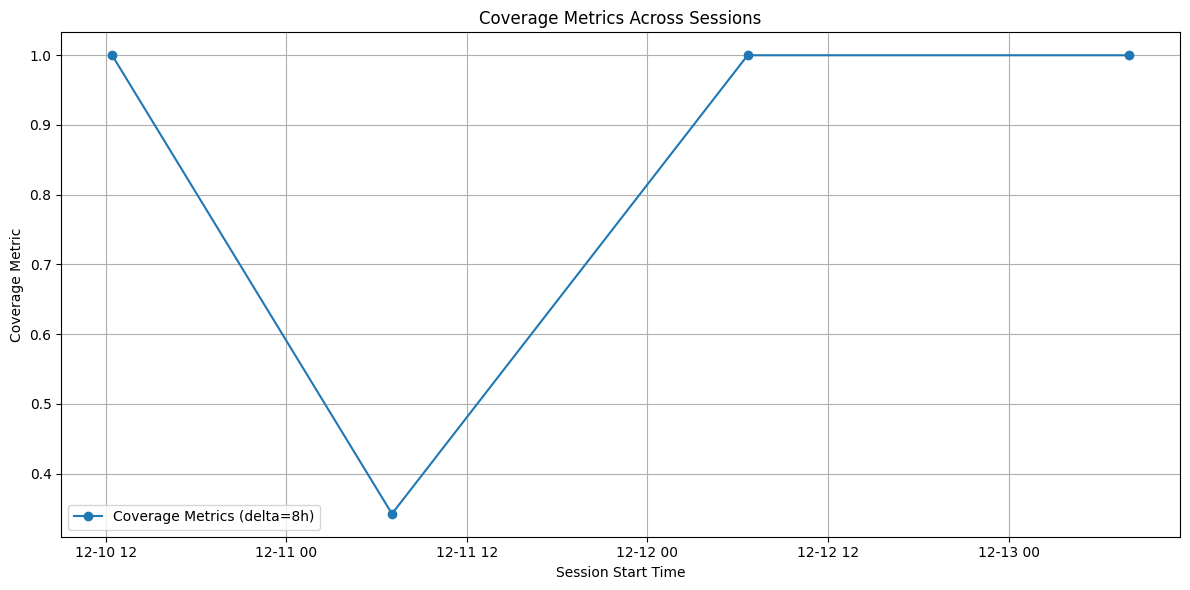

In [16]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_coverage_metrics(
    interactions_path: str, items_path: str, delta: int, save_path: str = None
):
    """
    Plot the coverage metrics for each session.

    :param interactions_path: Path to the CSV file containing user interactions data.
    :param items_path: Path to the CSV file containing the catalog of all items.
    :param delta: Time gap (in seconds) to define a new session.
    :param save_path: Optional. File path to save the generated plot (default: None).
    """
    # Calculate coverage metrics
    coverage_metrics = categories_coverage_metrics(interactions_path, items_path, delta)

    # Load interactions to get session times
    interactions_df = pd.read_csv(interactions_path)
    interactions_df = merge_item_cat2(interactions_df, items_path)
    interactions_df["time"] = pd.to_datetime(interactions_df["time"], errors="coerce")
    interactions_df = interactions_df.dropna(subset=["time"])
    interactions_df = interactions_df.sort_values(by="time")
    interactions_df["session_id"] = (
        interactions_df["time"].diff().dt.total_seconds() > delta
    ).cumsum()

    session_times = interactions_df.groupby("session_id")["time"].min()

    # Plot the coverage metrics
    plt.figure(figsize=(12, 6))
    plt.plot(
        session_times,
        coverage_metrics,
        label=f"Coverage Metrics (delta={delta // 3600}h)",
        marker="o",
    )
    plt.xlabel("Session Start Time")
    plt.ylabel("Coverage Metric")
    plt.title("Coverage Metrics Across Sessions")
    plt.grid()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format="png")
        print(f"Graph saved at: {save_path}")
    else:
        plt.show()


# Example usage
plot_coverage_metrics(
    interactions_path="../data/interactions.csv",
    items_path="../data/items.csv",
    delta=8 * 60 * 60,
    save_path="coverage_metrics.png",
)


In [ ]:
import pandas as pd


def replace_csv_separator(input_csv_path: str, output_csv_path: str):
    """
    Replace the separator in a CSV file from ',' to ';'.

    :param input_csv_path: Path to the input CSV file with ',' separator.
    :param output_csv_path: Path to the output CSV file with ';' separator.
    """
    # Read the input CSV file
    df = pd.read_csv(input_csv_path)

    # Write to a new CSV file with ';' as the separator
    df.to_csv(output_csv_path, sep=";", index=False)


# Example usage
replace_csv_separator("input.csv", "output.csv")


total categories =  219
len(recommended_cat2) = 219 in case 0
len(recommended_cat2) = 75 in case 1
len(recommended_cat2) = 219 in case 2
len(recommended_cat2) = 219 in case 3
Graph saved at: combined_metrics.png


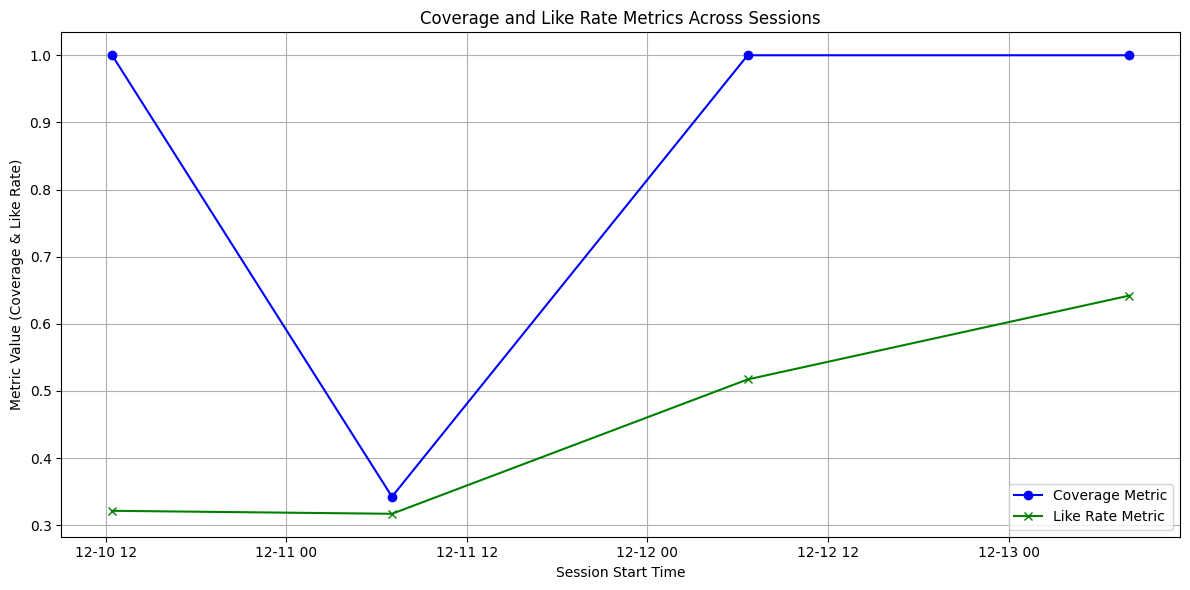

In [19]:
import pandas as pd


def categories_coverage_metrics(
    interactions_path: str, items_path: str, delta: int
) -> list:
    """
    Calculate the coverage metric for recommendations within sessions defined by delta.

    :param interactions_path: Path to the CSV file containing user interactions data.
    :param items_path: Path to the CSV file containing the catalog of all items.
    :param delta: Time gap (in seconds) to define a new session.
    :return: List of coverage metrics for each session as floats between 0 and 1.
    """
    # Load the interactions and items data
    interactions_df = pd.read_csv(interactions_path)

    interactions_df = merge_item_cat2(interactions_df, items_path)
    interactions_df["time"] = pd.to_datetime(interactions_df["time"], errors="coerce")
    interactions_df = interactions_df.dropna(subset=["time"])
    interactions_df = interactions_df.sort_values(by="time")

    items_df = pd.read_csv(items_path)

    # Define sessions based on the delta threshold
    interactions_df["session_id"] = (
        interactions_df["time"].diff().dt.total_seconds() > delta
    ).cumsum()

    # Initialize variables to compute coverage
    total_categories = set(items_df["cat2"])
    print("total categories = ", len(total_categories))
    session_coverage = []

    # Iterate through sessions to compute coverage
    session_ids = interactions_df["session_id"].unique()
    for session_id in session_ids:
        session_data = interactions_df[interactions_df["session_id"] == session_id]
        recommended_cat2 = set(session_data["cat2"])
        print(f"len(recommended_cat2) = {len(recommended_cat2)} in case {session_id}")

        coverage = (
            len(recommended_cat2 & total_categories) / len(total_categories)
            if total_categories
            else 0
        )
        session_coverage.append(coverage)

    return session_coverage


def plot_combined_metrics(
    interactions_path: str,
    items_path: str,
    delta: int,
    save_path: str = None,
):
    """
    Plot both coverage and like-rate metrics for each session on the same graph with a single y-axis.

    :param interactions_path: Path to the CSV file containing user interactions data.
    :param items_path: Path to the CSV file containing the catalog of all items.
    :param delta: Time gap (in seconds) to define a new session.
    :param save_path: Optional. File path to save the generated plot (default: None).
    """
    # Calculate coverage metrics
    coverage_metrics = categories_coverage_metrics(interactions_path, items_path, delta)

    # Load interactions to get session times
    interactions_df = pd.read_csv(interactions_path)

    interactions_df = merge_item_cat2(interactions_df, items_path)
    interactions_df["time"] = pd.to_datetime(interactions_df["time"], errors="coerce")
    interactions_df = interactions_df.dropna(subset=["time"])
    interactions_df = interactions_df.sort_values(by="time")
    interactions_df["session_id"] = (
        interactions_df["time"].diff().dt.total_seconds() > delta
    ).cumsum()

    session_times = interactions_df.groupby("session_id")["time"].min()

    # Calculate like-rate metrics for each session
    like_rate_metrics = []
    for session_id in interactions_df["session_id"].unique():
        session_data = interactions_df[interactions_df["session_id"] == session_id]
        session_start = session_data["time"].min()
        session_end = session_data["time"].max()
        like_rate = compute_mean_ratios(
            interactions_path,
            delta,
            start_time=session_start.strftime("%Y-%m-%d %H:%M:%S"),
            end_time=session_end.strftime("%Y-%m-%d %H:%M:%S"),
        )
        like_rate_metrics.append(like_rate)

    # Plot the combined metrics
    plt.figure(figsize=(12, 6))

    # Plot both metrics on the same y-axis
    plt.plot(
        session_times,
        coverage_metrics,
        label="Coverage Metric",
        color="blue",
        marker="o",
    )
    plt.plot(
        session_times,
        like_rate_metrics,
        label="Like Rate Metric",
        color="green",
        marker="x",
    )

    plt.xlabel("Session Start Time")
    plt.ylabel("Metric Value (Coverage & Like Rate)")
    plt.title("Coverage and Like Rate Metrics Across Sessions")
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # Save or Show Plot
    if save_path:
        plt.savefig(save_path, format="png")
        print(f"Graph saved at: {save_path}")
    else:
        plt.show()


# Example usage
plot_combined_metrics(
    interactions_path="../data/interactions.csv",
    items_path="../data/items.csv",
    delta=8 * 60 * 60,
    save_path="combined_metrics.png",
)


In [20]:
import pandas as pd


def plot_global_like_rate(
    interactions_path: str,
    delta: int,
    config: dict = None,
):
    """
    Plot the average like-rate over global sessions.

    :param interactions_path: Path to the CSV file containing interactions data.
    :param delta: Time gap (in seconds) to define a new global session.
    :param config: Dictionary with configuration options:
                   - start_time: Start of the time range as a string (default: None)
                   - end_time: End of the time range as a string (default: None)
                   - save_path: File path to save the generated plot (default: None)
    """
    # Default configuration
    config = config or {}
    start_time = config.get("start_time")
    end_time = config.get("end_time")
    save_path = config.get("save_path")

    # Load the interactions data
    interactions = pd.read_csv(interactions_path)
    interactions["time"] = pd.to_datetime(interactions["time"], errors="coerce")
    interactions = interactions.dropna(subset=["time"])

    # Convert start_time and end_time to datetime if provided
    if start_time:
        start_time = pd.to_datetime(start_time, errors="coerce")
        interactions = interactions[interactions["time"] >= start_time]
    if end_time:
        end_time = pd.to_datetime(end_time, errors="coerce")
        interactions = interactions[interactions["time"] <= end_time]

    if interactions.empty:
        print("No valid data available for the specified time range.")
        return

    # Sort interactions by time
    interactions = interactions.sort_values(by="time")

    # Define global sessions based on the delta threshold
    interactions["session_id"] = (
        interactions["time"].diff().dt.total_seconds() > delta
    ).cumsum() + 1

    # Compute mean ratios for each session using

    session_ids = interactions["session_id"].unique()
    session_like_rates = []
    session_times = []
    session_interactions_counts = []

    for session_id in session_ids:
        session_data = interactions[interactions["session_id"] == session_id]
        session_start = session_data["time"].min()
        session_end = session_data["time"].max()
        interaction_count = len(session_data)

        like_rate = compute_mean_ratios(
            interactions_path=interactions_path,
            eps=delta,
            start_time=str(session_start),
            end_time=str(session_end),
        )
        session_like_rates.append((session_id, like_rate))
        session_times.append((session_start, session_end))
        session_interactions_counts.append(interaction_count)

    # Plot the average like-rate over sessions
    session_ids, like_rates = zip(*session_like_rates)
    plt.figure(figsize=(12, 6))
    plt.plot(
        session_ids,
        like_rates,
        label=f"Global Like Rate (delta={delta // 3600}h)",
        marker="o",
    )

    # Annotate session start, end times, and interaction counts on the graph
    for i, ((start, end), count) in enumerate(
        zip(session_times, session_interactions_counts)
    ):
        # Adjust position of text annotation to avoid overlapping
        offset = 0.02 if i % 2 == 0 else -0.02
        plt.text(
            session_ids[i],
            like_rates[i] + offset,
            f"{start.strftime('%Y-%m-%d %H:%M')}\n{end.strftime('%Y-%m-%d %H:%M')}\n{count} interactions",
            fontsize=9,
            ha="center",
        )

    plt.xlabel("Session ID")
    plt.ylabel("Average Like Rate")
    plt.title("Average Like Rate Across Global Sessions")
    plt.grid()
    plt.legend()
    plt.tight_layout()

    # Ensure x-axis is in integer format without duplicate values
    plt.xticks(session_ids, [int(x) for x in session_ids])

    if save_path:
        plt.savefig(save_path, format="png")
        print(f"Graph saved at: {save_path}")
    else:
        plt.show()


# Example usage
# plot_global_like_rate("interactions.csv", delta=3600, config={"save_path": "like_rate.png"})


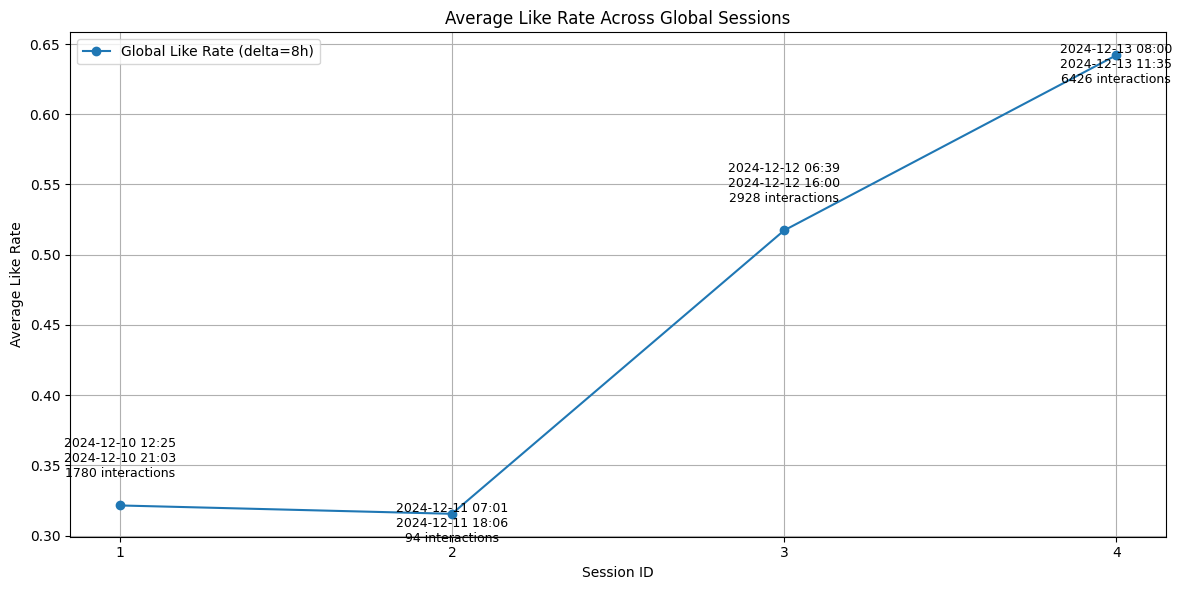

In [21]:
# Example usage
plot_global_like_rate("../data/interactions.csv", delta=8 * 60 * 60)

In [33]:
import pandas as pd
import plotly.graph_objects as go


def plot_global_like_rate(
    interactions_path: str,
    delta: int,
    config: dict = None,
):
    """
    Plot the average like-rate over global sessions.

    :param interactions_path: Path to the CSV file containing interactions data.
    :param delta: Time gap (in seconds) to define a new global session.
    :param config: Dictionary with configuration options:
                   - start_time: Start of the time range as a string (default: None)
                   - end_time: End of the time range as a string (default: None)
                   - save_path: File path to save the generated plot (default: None)
    """
    # Default configuration
    config = config or {}
    start_time = config.get("start_time")
    end_time = config.get("end_time")
    save_path = config.get("save_path")

    # Load the interactions data
    interactions = pd.read_csv(interactions_path)
    interactions["time"] = pd.to_datetime(interactions["time"], errors="coerce")
    interactions = interactions.dropna(subset=["time"])

    # Convert start_time and end_time to datetime if provided
    if start_time:
        start_time = pd.to_datetime(start_time, errors="coerce")
        interactions = interactions[interactions["time"] >= start_time]
    if end_time:
        end_time = pd.to_datetime(end_time, errors="coerce")
        interactions = interactions[interactions["time"] <= end_time]

    if interactions.empty:
        print("No valid data available for the specified time range.")
        return

    # Sort interactions by time
    interactions = interactions.sort_values(by="time")

    # Define global sessions based on the delta threshold
    interactions["session_id"] = (
        interactions["time"].diff().dt.total_seconds() > delta
    ).cumsum() + 1

    # Compute mean ratios for each session
    session_ids = interactions["session_id"].unique()
    session_like_rates = []
    session_labels = []
    session_interactions_counts = []

    for session_id in session_ids:
        session_data = interactions[interactions["session_id"] == session_id]
        session_start = session_data["time"].min()
        session_end = session_data["time"].max()
        interaction_count = len(session_data)

        like_rate = compute_mean_ratios(
            interactions_path=interactions_path,
            eps=delta,
            start_time=str(session_start),
            end_time=str(session_end),
        )
        session_like_rates.append(like_rate)
        session_labels.append(
            f"{session_start.strftime('%b %d')}<br>{session_start.strftime('%H:%M')} - {session_end.strftime('%H:%M')}<br>{interaction_count} interactions"
        )
        session_interactions_counts.append(interaction_count)

    # Prepare the data for Plotly
    fig = go.Figure()

    # Add the line plot
    fig.add_trace(
        go.Scatter(
            x=session_ids,
            y=session_like_rates,
            mode="lines+markers",
            marker=dict(color="blue", size=8),
            line=dict(color="blue", width=2),
            name=f"Global Like Rate (delta={delta // 3600}h)",
        )
    )

    # Update x-axis labels with session start and end times
    fig.update_layout(
        title="Like Rate Across Global Sessions",
        xaxis_title="Session ID (Start - End Times)",
        yaxis_title="Average Like Rate",
        template="plotly_white",
        legend=dict(title="Legend"),
        font=dict(size=12),
        xaxis=dict(
            tickmode="array", tickvals=list(session_ids), ticktext=session_labels
        ),
        width=800,  # Adjust width here to make the plot narrower
    )

    if save_path:
        fig.write_image(save_path)
        print(f"Graph saved at: {save_path}")
    else:
        fig.show()


# Example usage
# plot_global_like_rate("interactions.csv", delta=3600, config={"save_path": "like_rate.png"})


In [38]:
# Example usage
plot_global_like_rate("../data/interactions2.csv", delta=6 * 60 * 60)